In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
training_df = pd.read_csv("./training.csv")

training_df.fillna(0, inplace=True)
training_df.drop(['date', 'month'], axis=1, inplace=True)

# Splitting features and target
X = training_df.drop('fire', axis=1)
y = training_df['fire']

def feature_transformation(encode_df):
    num_attributes=encode_df.columns.to_list()
    numeric_pipeline=Pipeline([
        ('std_scaler',StandardScaler())
    ])
    encoder_pipeline=ColumnTransformer([
        ("numeric_var",numeric_pipeline,num_attributes),
    ])
    df_encoded=encoder_pipeline.fit_transform(encode_df)
    return df_encoded,encoder_pipeline
X_transformed=feature_transformation(X)[0]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with Grid Search
param_grid = {
    'C': [1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']   
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Tuned Hyperparameters: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with Tuned Hyperparameters: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     21432
           1       0.63      0.67      0.65     21477

    accuracy                           0.64     42909
   macro avg       0.64      0.64      0.64     42909
weighted avg       0.64      0.64      0.64     42909


Confusion Matrix:
[[13098  8334]
 [ 6996 14481]]


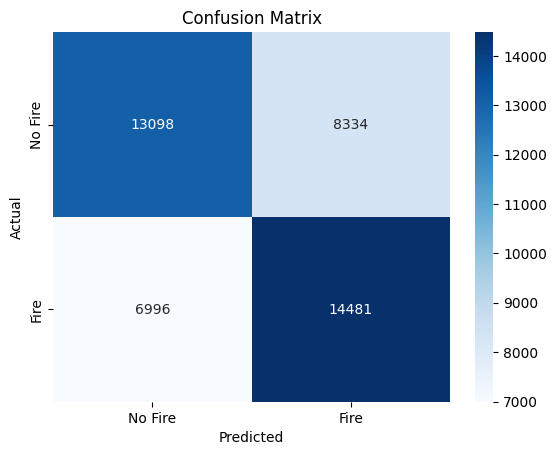

In [7]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AUC-ROC Score: 0.6426991991380555


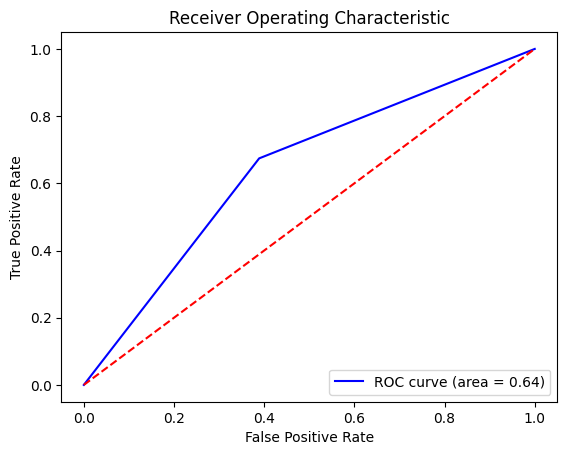

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_score)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()